# 11th Session

# Geometry of Ordinary Least Squares and multiple regression model

### Numerical Properties VS Statistical Properties

### A numerical property of OLS is that OLS residuals sum to zero when the regressors include a constant term

### Step 1: Creating population

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [ ]:
np.random.seed(0)

population_size = 99999

X_population = np.random.randint(1000, 2000, size=population_size) 
Y_population = 2 * X_population + np.random.normal(0, 50, population_size) 

population_df = pd.DataFrame({'X': X_population, 'Y': Y_population})

### Step 2: Creating Samples out of population

In [2]:
np.random.seed(0)
sample_size = 200
sample_rand = np.random.choice(population_size, size = sample_size, replace= False)
x_sample = X_population[sample_rand]
y_sample = Y_population[sample_rand]

### Step 3: Running OLS with intercept

In [ ]:
sample_df = pd.DataFrame({
    'X_s': x_sample,
    'Y_s': y_sample
})

X_sample = sample_df['X_s']
Y_sample = sample_df['Y_s']

X_sample_intercept = sm.add_constant(X_sample)

model_sample = sm.OLS(Y_sample, X_sample_intercept).fit()

residuals = model_sample.resid
sum_of_residuals = np.sum(residuals)

print("Sum of Residuals:", sum_of_residuals)


Sum of Residuals: 3.228706191293895e-11


### Step 4: Running OLS without intercept

In [4]:
X_sample = sample_df['X_s']
Y_sample = sample_df['Y_s']

model_sample = sm.OLS(Y_sample, X_sample).fit()

# Get the residuals
residuals_without_intercept = model_sample.resid

# Calculate the sum of residuals
sum_of_residuals_without_intercept = np.sum(residuals_without_intercept)

# Print the sum of residuals
print("Sum of Residuals without intercept:", sum_of_residuals_without_intercept)

Sum of Residuals without intercept: 155.17299917409082


### In previous sessions when we talked about linear algebra, our was $\mathbb{R}^n$, however in this session, it is $\mathbb{E}^n$ 

$\mathbb{E}^n$ is the n-dimensional space equipped with the standard Euclidean metric. It represents the geometric space where distances and angles can be measured.

### Metric of $\mathbb{E}^n$:

$$ d((x_{1}, x_{2, \dots, x_{n}}), (y_{1}, y_{2}, \dots, y_{n})) = \sqrt{\sum_{i=1}^n (x_{i} - y_{i})^{2}}$$

### If regressors $(\bold{X} \equiv [x_{1}, x_{2}, \dots, x_{k}])$ are linearly Independent they span a subspace in $\mathbb{E}^n$ denoted by $S(\bold{X})$ where it consists of all points in $\mathbb{E}^n$ such that $\bold{z} = \bold{X}\bold{\gamma}$, where $\bold{\gamma}$ is k-vector.

- The **dimension** of $S(\bold{X})$ = $\rho (\bold{X})$

- k < n

- n > k is not possible, why?

The natural inner product is needed to define the Euclidean space. A Euclidean space is not fully defined without specifying an inner product. The natural inner product provides a way to measure the "similarity" or "closeness" between two points in the Euclidean space.

if a n-vector called z belongs to $S(\bold{X})$, we can write it as a linear combination of the columns of $\bold{X}$

$$ \bold{z} = \sum_{i=1}^k \gamma_{i} \bold{x}_{i} = \bold{X \gamma}$$

- If columns of $\bold{X}$ are linearly independent.

### Reminder:

- If there are linear depedent vectors, then the dimension of span will be less than the case where all vectors are linearly independent.

# Multiple Regression Model (two indepndent variable)

$$ Y = \beta_{0} + \beta_{1} X_{1} + \beta_{2} X_{2} + \epsilon$$

### Step 1: Creating population

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

np.random.seed(0)

population_sizee = 11111

X1_population = np.random.randint(500, 700, size=population_sizee) 
X2_population = np.random.randint(500, 700, size=population_sizee) 
Y_pop = 2 * X1_population + 3 * X2_population + np.random.normal(0, 50, population_sizee) 

pop_df = pd.DataFrame({'X1': X1_population, 'X2' : X2_population, 'Y': Y_pop})
pop_df.tail()

,X1,X2,Y
11106,535,518,2601.793890
11107,576,592,2965.380616
11108,522,546,2778.102493
11109,561,600,2823.133155
11110,689,637,3303.072066


### Step 2: Creating Samples out of population

In [6]:
np.random.seed(0)
smple_size = 200
smple_rand = np.random.choice(population_sizee, size = sample_size, replace= False)
x1_sample = X1_population[smple_rand]
x2_sample = X2_population[smple_rand]
y_smple = Y_pop[smple_rand]

### Step 3: Running OLS

In [7]:
smple_df = pd.DataFrame({
    'X1': x1_sample,
    'X2': x2_sample,
    'Y': y_smple 
    })

Xs_sample = smple_df[['X1', 'X2']]
Y_smple = smple_df['Y']

Xs_sample_intercept = sm.add_constant(Xs_sample)

model_smple = sm.OLS(Y_smple, Xs_sample_intercept).fit()

print("\nOLS Regression Results for Sample:")
print(model_smple.summary())


OLS Regression Results for Sample:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1478.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          2.41e-119
Time:                        14:59:39   Log-Likelihood:                -1077.8
No. Observations:                 200   AIC:                             2162.
Df Residuals:                     197   BIC:                             2171.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16

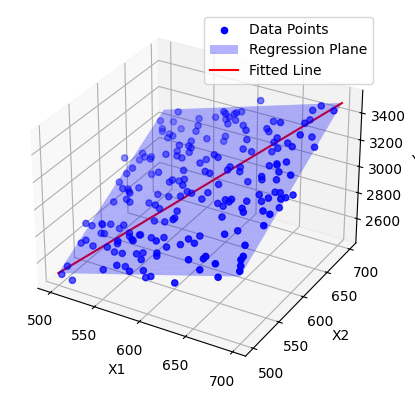

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(smple_df['X1'], smple_df['X2'], smple_df['Y'], color='blue', label='Data Points')

x_surf, y_surf = np.meshgrid(np.linspace(smple_df['X1'].min(), smple_df['X1'].max(), 100),
                             np.linspace(smple_df['X2'].min(), smple_df['X2'].max(), 100))
z_surf = model_smple.params.iloc[0] + model_smple.params.iloc[1] * x_surf + model_smple.params.iloc[2] * y_surf

ax.plot_surface(x_surf, y_surf, z_surf, color='blue', alpha=0.3, label='Regression Plane')

# Create a range of X1 and X2 values to plot the fitted line
X1_range = np.linspace(smple_df['X1'].min(), smple_df['X1'].max(), 100)
X2_range = np.linspace(smple_df['X2'].min(), smple_df['X2'].max(), 100)

# Calculate the predicted Y values using the fitted model
Y_pred = model_smple.params.iloc[0] + model_smple.params.iloc[1] * X1_range + model_smple.params.iloc[2] * X2_range

# Plot the fitted line
ax.plot(X1_range, X2_range, Y_pred, color='red', label='Fitted Line')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()

plt.show()


linspace and .min(): 

The np.linspace() function is used to create a evenly spaced array of values between a specified minimum and maximum value. In this case, the code is creating 100 evenly spaced values between the minimum and maximum values of the 'X1' and 'X2' columns in the smple_df dataframe. This is done to create a grid of x_surf and y_surf values that will be used to plot the 3D regression plane.

### A statistical property of OLS is the fact that estimators are unbiased the residuals are orthogonal to independent variables.

Dot Product of Residuals and X1: 3.371933416929096e-07
Dot Product of Residuals and X2: 3.372842911630869e-07


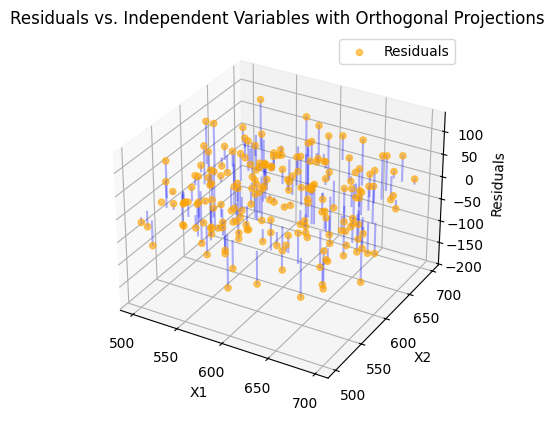

In [9]:
X = sm.add_constant(smple_df[['X1', 'X2']])

model_smple = sm.OLS(smple_df['Y'], X).fit()

Y_pred = model_smple.predict(X)

residuals = smple_df['Y'] - Y_pred

dot_product_X1 = np.dot(residuals, smple_df['X1'])
dot_product_X2 = np.dot(residuals, smple_df['X2'])

print(f"Dot Product of Residuals and X1: {dot_product_X1}")
print(f"Dot Product of Residuals and X2: {dot_product_X2}")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(smple_df['X1'], smple_df['X2'], residuals, color='orange', label='Residuals', alpha=0.6)

# Calculate mean of residuals
mean_residual = np.mean(residuals)

# Plot orthogonal lines
for i in range(len(smple_df)):
    ax.plot([smple_df['X1'].iloc[i], smple_df['X1'].iloc[i]], 
             [smple_df['X2'].iloc[i], smple_df['X2'].iloc[i]], 
             [0, residuals[i]], color='blue', alpha=0.3)

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Residuals')
ax.set_title('Residuals vs. Independent Variables with Orthogonal Projections')
ax.legend()

plt.show()


# Orthogonal Complement

- The orthogonal complement of $S(\bold{X})$ in En, which is denoted $S^{\bot}(\bold{X})$, is
the set of all points $\bold{w}$ in $\mathbb{E}^n$ such that, for any $\bold{z}$ in $S(\bold{X})$, $\bold{w}^{\bot} \bold{z} = \bold{0}$. Thus
every point in $S^{\bot}(\bold{X})$ is orthogonal to every point in $S(\bold{X})$ (two points are said to be orthogonal if their inner product is zero).

- Since the dimension of $S(\bold{X})$ is $k$, the dimension of $S^{\bot}(\bold{X})$ is $n − k$.

- It is sometimes convenient to refer not to the dimension of a linear subspace but to its codimension. A linear subspace of $\mathbb{E}^n$ is said to have codimension $j$ if the dimension of its orthogonal complement is $j$. Thus, in this case, $S(\bold{X})$ has dimension $k$ and codimension $n − k$, and $S^{\bot}(\bold{X})$ has dimension $n − k$ and codimension k.



In [ ]:
one_D_X1 = smple_df['X1'].to_numpy()
one_D_X2 = smple_df['X2'].to_numpy()

vectors = np.column_stack((one_D_X1, one_D_X2, np.zeros(len(smple_df))))

normal_vector = np.cross(vectors[0], vectors[1])

print("Orthogonal vector (normal vector):", normal_vector)

Orthogonal vector (normal vector): [     0.      0. -59774.]


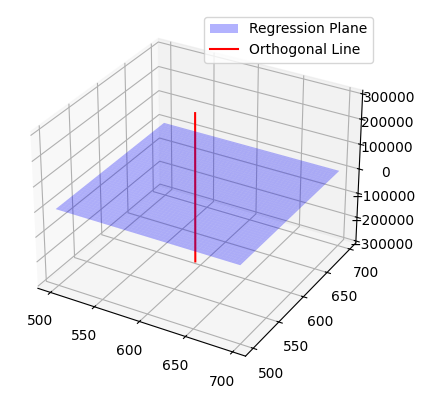

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf, y_surf = np.meshgrid(np.linspace(smple_df['X1'].min(), smple_df['X1'].max(), 100),
                             np.linspace(smple_df['X2'].min(), smple_df['X2'].max(), 100))
z_surf = model_smple.params.iloc[0] + model_smple.params.iloc[1] * x_surf + model_smple.params.iloc[2] * y_surf

ax.plot_surface(x_surf, y_surf, z_surf, color='blue', alpha=0.3, label='Regression Plane')

point_on_plane = np.array([smple_df['X1'].mean(), smple_df['X2'].mean(), 
                           model_smple.params.iloc[0] + model_smple.params.iloc[1] * smple_df['X1'].mean() + 
                           model_smple.params.iloc[2] * smple_df['X2'].mean()])

t = np.linspace(-5, 5, 100)  
line_points = point_on_plane[:, np.newaxis] + t * normal_vector[:, np.newaxis]
ax.plot(line_points[0], line_points[1], line_points[2], color='red', label='Orthogonal Line')
plt.legend()
plt.show()

## More on Multiple Regression model

## Marginal effects of the model above

In [ ]:
# Calculate marginal effects (coefficients)
b1 = model_smple.params['X1']  # Coefficient for X1
b2 = model_smple.params['X2']  # Coefficient for X2

print(f"\nMarginal Effect of X1 (b1): {b1}")
print(f"Marginal Effect of X2 (b2): {b2}")


Marginal Effect of X1 (b1): 2.0210393537987326
Marginal Effect of X2 (b2): 2.9509120591906566


- When X1 increases by one, the expected value of Y will change by $\beta 1$.

- When X2 increases by one, the expected value of Y will change by $\beta 2$​ .


The coefficients $\beta 1$ and $\beta 2$​ represent the unique effect of each variable on Y while holding the other variable constant. However, in reality, variables can interact in ways that are not accounted for in a simple linear model.

### Synergy Effect: This occurs when the combined effect of two or more variables is greater (or lesser) than the sum of their individual effects. In other words, the interaction between the variables produces an additional effect on Y.


$ Y = \beta_{0} + \beta_{1} Advertising + \beta_{2} Promotions + \epsilon$

Interpretation:

$\beta 1$​ indicates how much sales increase for each additional unit spent on advertising, holding promotions constant.

$\beta 2$​ indicates how much sales increase for each additional unit spent on promotions, holding advertising constant.

### Potential Synergy:

If advertising and promotions work together effectively, the combined effect on sales may be greater than just adding the individual effects. For example, if spending on advertising increases awareness, and that awareness enhances the effectiveness of promotions, the interaction effect could be significant.



### Model With Interaction:

$ Y = \beta_{0} + \beta_{1} Advertising + \beta_{2} Promotions + \beta_{3} (Advertising \times Promotions) + \epsilon$



Interpretation of Interaction Term:

The coefficient $\beta_{3}$ captures the synergy effect. If $\beta_{3}$ is positive, it indicates that the combined effect of advertising and promotions is greater than the sum of their individual effects.

